# Importing Libraries

In [1]:
#import libraries 

#structures
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
sns.set()
from mpl_toolkits.mplot3d import Axes3D

#get model duration
import time
from datetime import date

# Description of data

In [2]:
#load train dataset
train_data = 'train.csv'
train_dataset = pd.read_csv(train_data)
train_dataset.shape

(891, 12)

The titanic train data consists of 891 rows and 12 columns. <br>
Means we have a total of 891 passengers and 12 features in the train dataset.

In [3]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Data Definitions**


* PassengerId - Unique Id of each passenger on the ship
* Survived - '0' for not survived & '1' for survived
* Pclass - Passenger class: '1' for 1st class, '2' for 2nd class & '3' for 3rd class
* Name - Passenger name
* Sex - Passenger gender: 'male' or 'female'
* Age - Passenger age
* SibSp - No. of siblings or spouses aborded Titanic together with the passenger
* Parch - No. of parents or children aborded Titanic together with the passenger
* Ticket - Passenger ticket number
* Fare - Passenger ticket fare
* Cabin - Passenger cabin number
* Embarked - Encoded name of city passenger embarked

# Analyzing Data

<AxesSubplot:xlabel='Survived', ylabel='count'>

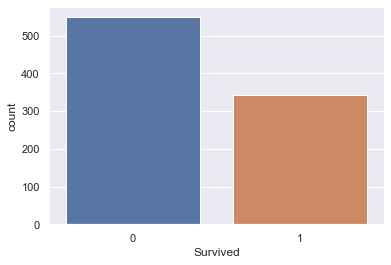

In [6]:
sns.countplot(x="Survived", data=train_dataset)

<AxesSubplot:xlabel='Survived', ylabel='count'>

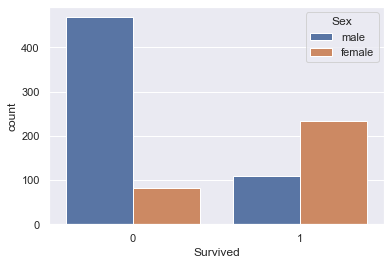

In [7]:
sns.countplot(x="Survived", hue="Sex", data=train_dataset)

We can see females have a higher survival rate than males in this scenario. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

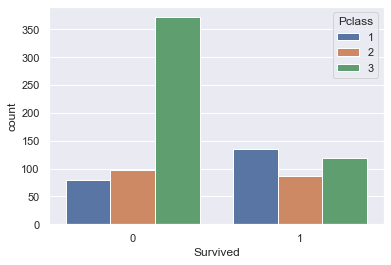

In [8]:
sns.countplot(x="Survived", hue="Pclass", data=train_dataset)

The death rate of 3rd class passengers are much higher than the other 2 passenger classes.

In [16]:
total_dataset = pd.concat([train_dataset, test_dataset])

In [17]:
total_dataset.shape

(1309, 12)

In [18]:
total_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
total_dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


We can see that younger people tend to have a slightly higher survival rate than the older counterpart.

From 3 histograms above, we can see both train & test datasets have similar distribution of data in terms of Passenger Class as well.

We can see that older population of passengers are more likely to be in Passenger Class 1 & Class 2 than Class 3.

So we can see most of the passengers on Titanic are 3rd class passengers.

In [9]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Cleaning Data

In [10]:
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see, there are many null values under 'Cabin' column. <br>

687 out of 891 data points is a really high amount. Also there are quite a number of null values under age. <br>

This will surely affect the prediction results if left unhandled. <br>

Handling null values in dataset has two approaches. We can determine the null value at a given point by averaging out the surrounding values under the feature. However, this only works given that the data is an ordinal data and we know that it is in either ascending or descending order or have some sort of pattern. In our case, it is not. And same for the 'Cabin' feature as well which actually looks like a nominal data. <br>

Therefore, I decided to remove 177 lines of data from Age along with the whole column of 'Cabin' from the dataset.

Same can be said for test dataset. Again features "Age" & "Cabin".

<AxesSubplot:>

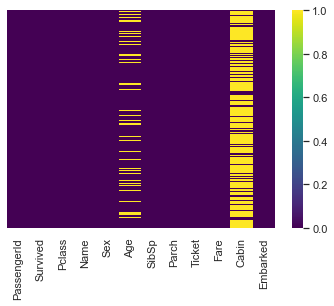

In [11]:
sns.heatmap(train_dataset.isnull(), yticklabels=False, cmap="viridis")

In [12]:
#dropping 'Cabin' feature
train_dataset.drop("Cabin", axis=1, inplace=True)

In [13]:
#check if the 'Cabin' feature is dropped
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

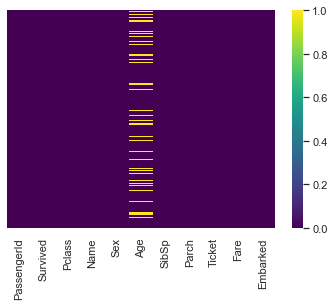

In [14]:
sns.heatmap(train_dataset.isnull(), yticklabels=False, cmap="viridis")

In [15]:
#dropping rows of data with 'Age' null
train_dataset.dropna(inplace=True)

We can't drop null rows of "Age" under test dataset because if we do so, the number of predictions will be less. <br>

But we can't leave these null values as it is as well. That will become a problem during a prediction. <br>

So we will fill up these null values with average values. Under Description of Data section - we already have average values for the test dataset. Lets call it back.

In [16]:
#checking if any more null value in the dataset
train_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

So now it is confirmed that both the train & test datasets are clean without any null value.

In [17]:
train_dataset.shape

(712, 11)

We are left with 712 data points which is plenty.

Test dataset still have full data points.

Now we need to convert features: "Pclass", "Sex" & "Embarked" into categorical binary data which is 0 & 1 or True or False or something along. We have 2 options: we can use a label encoder or we can use a pandas method as well. <br>

First, lets check how many unique values in each of these features.

In [18]:
train_dataset.Pclass.unique()

array([3, 1, 2], dtype=int64)

We have 3 unique values.
So we can convert 'Pclass' feature into 2 columns '2' for 2nd Class & '3' for 3rd Class with 0 for No & 1 for Yes values.
0 in both of these columns will be automatically 1st class.

In [67]:
train_dataset.Sex.unique()

array(['male', 'female'], dtype=object)

We have 2 unique values only. So we can convert 'Sex' feature values into '0' for female & '1' for male.

We can convert 'Embarked' feature into 3 columns 'S', 'C', 'Q' with 0 for No & 1 for Yes values.

In [19]:
Pcl_train=pd.get_dummies(train_dataset["Pclass"],drop_first=True)

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X1 = train_dataset
a = train_dataset['Sex']

X1['Sex'] = le.fit_transform(X1['Sex'])

a = le.transform(a)
train_dataset = X1

In [21]:
embark_train=pd.get_dummies(train_dataset["Embarked"])

In [22]:
train_dataset=pd.concat([train_dataset,embark_train,Pcl_train],axis=1)
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,0,1,0,1


Lets drop the redundant columns which includes 'Pclass', 'Name', 'Ticket' & 'Embarked'.

In [23]:
train_dataset.drop(['Pclass', 'Name','Ticket','Embarked'],axis=1, inplace=True)
train_dataset.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,C,Q,S,2,3
0,1,0,1,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,0,38.0,1,0,71.2833,1,0,0,0,0
2,3,1,0,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,0,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,1,35.0,0,0,8.0500,0,0,1,0,1


# Pearson's Correlation

In [24]:
#get correlation map
corr_mat=train_dataset.corr()

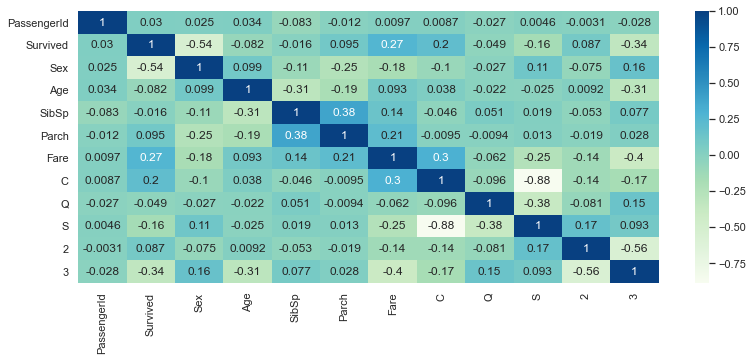

In [25]:
#visualise data
plt.figure(figsize=(13,5))
sns_plot=sns.heatmap(data=corr_mat, annot=True, cmap='GnBu')
plt.show()

# Scaling Dataset

In [26]:
#to run for model without scaling
dropped_passengerId = train_dataset.drop("PassengerId", axis=1)

X_train = dropped_passengerId.drop("Survived", axis=1)
y_train = train_dataset["Survived"]

In [27]:
#to run for model with scaling
dropped_passengerId = train_dataset.drop("PassengerId", axis=1)

dropped_survived = dropped_passengerId.drop("Survived", axis=1)

dropped_survived.head()

,Sex,Age,SibSp,Parch,Fare,C,Q,S,2,3
0,1,22.0,1,0,7.2500,0,0,1,0,1
1,0,38.0,1,0,71.2833,1,0,0,0,0
2,0,26.0,0,0,7.9250,0,0,1,0,1
3,0,35.0,1,0,53.1000,0,0,1,0,0
4,1,35.0,0,0,8.0500,0,0,1,0,1


0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [86]:
X_train = dropped_survived.iloc[:,0:10]
y_train = train_dataset["Survived"]

X_test = test_dropped_passengerId.iloc[:,0:10]

## Standard Scaler

In [30]:
from sklearn.preprocessing import StandardScaler

In [33]:
#stadardize data
X_train_scaled = StandardScaler().fit_transform(X_train)

In [34]:
#get feature names
X_train_columns = train_dataset.columns[:10]

## Min-Max Scaler

## Robust Scaler

## Training using Train Dataset

## Logistics Regression

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
logmodel=LogisticRegression()

In [94]:
%%time
logmodel.fit(X_train_scaled,y_train)

Wall time: 84 ms


LogisticRegression()

In [95]:
%%time
predictions2 = logmodel.predict(X_train_scaled)
print(predictions2)

[0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0
 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1
 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0
 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0
 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1
 0 0 1 0 1 1 0 0 0 0 0 0 

In [171]:
from sklearn.metrics import classification_report

print("Logistic Regression\n")
print(classification_report(y_train, predictions2))

Logistic Regression

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       424
           1       0.78      0.72      0.75       288

    accuracy                           0.80       712
   macro avg       0.80      0.79      0.79       712
weighted avg       0.80      0.80      0.80       712



## K-NN

In [118]:
import time
st = time.time()
en = time.time()
print(st-en)

0.0


In [158]:
import math
math.sqrt(len(X_train_scaled))

26.68332812825267

Result is 26, so we can use 25 or 27 for K. Hence I will use 27.

In [159]:
from sklearn.neighbors import KNeighborsClassifier

In [160]:
knnmodel = KNeighborsClassifier(n_neighbors=21, p=2, metric='euclidean') #p is 2 cuz we are looking for survived or not: 2 results

In [161]:
%%time
knnmodel.fit(X_train_scaled, y_train)

Wall time: 2.96 ms


KNeighborsClassifier(metric='euclidean', n_neighbors=21)

In [162]:
#predict the test set results
predictions = knnmodel.predict(X_train_scaled)

In [173]:
from sklearn.metrics import classification_report

print("KNN\n")
print(classification_report(y_train, predictions))

KNN

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       424
           1       1.00      0.97      0.98       288

    accuracy                           0.99       712
   macro avg       0.99      0.98      0.99       712
weighted avg       0.99      0.99      0.99       712



## Decision Tree

In [164]:
from sklearn.tree import DecisionTreeClassifier

In [165]:
decisionmodel = DecisionTreeClassifier()

In [166]:
%%time
decisionmodel.fit(X_train_scaled, y_train)

Wall time: 23.9 ms


DecisionTreeClassifier()

In [167]:
#predict the test set results
predictions = decisionmodel.predict(X_train_scaled)

In [174]:
from sklearn.metrics import classification_report

print("Decision Tree\n")
print(classification_report(y_train, predictions))

Decision Tree

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       424
           1       1.00      0.97      0.98       288

    accuracy                           0.99       712
   macro avg       0.99      0.98      0.99       712
weighted avg       0.99      0.99      0.99       712



# Graphs 

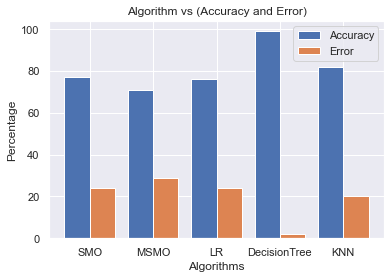

In [130]:
X = ['SMO','MSMO','LR','DecisionTree','KNN']
Accuracy= [77,
71,
76,
99,
82
]
error= [24,29,24,2,20]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Accuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, error, 0.4, label = 'Error')
  
plt.xticks(X_axis, X)
plt.xlabel("Algorithms")
plt.ylabel("Percentage")
plt.title("Algorithm vs (Accuracy and Error)")
plt.legend()
plt.show()

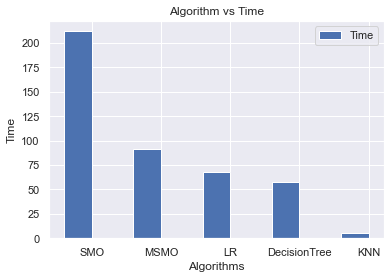

In [133]:
X = ['SMO','MSMO','LR','DecisionTree','KNN']
Accuracy= [212,
91,
68.1,
57.4,
4.99
]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Accuracy, 0.4, label = 'Time')
  
plt.xticks(X_axis, X)
plt.xlabel("Algorithms")
plt.ylabel("Time")
plt.title("Algorithm vs Time")
plt.legend()
plt.show()